In [33]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

IS the Graph bipartite ? True
{(1, 'a'), (3, 'c'), (2, 'b')}


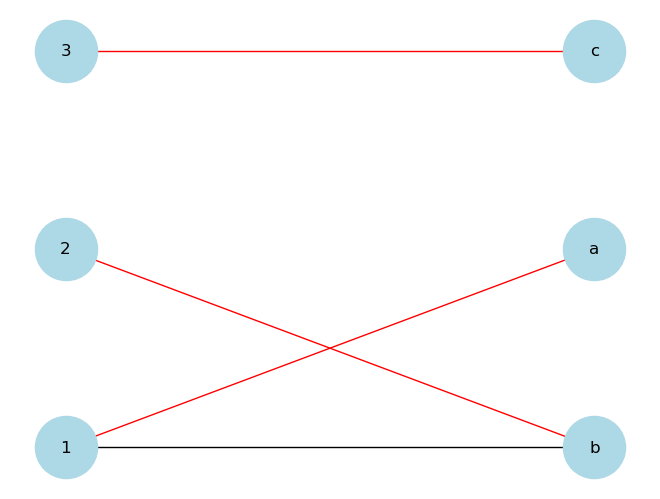

In [35]:
def create_bipartite_graph():
    B = nx.Graph()
    top_nodes = {1,2,3}
    bottom_nodes = {'a','b','c'}
    B.add_nodes_from(top_nodes,bipartite=0)
    B.add_nodes_from(bottom_nodes,bipartite=1)
    
    #add edges between nodes in the two sets
    edges = [(1,'a'),(1,'b'),(2,'b'),(3,'c')]
    B.add_edges_from(edges)
    
    return B , top_nodes , bottom_nodes

def greedy_maximum_matching(B , top_nodes , bottom_nodes):
    matching = set() #to store mathcing pair
    matched_nodes = set() #to track matched pairs 
    for u , v in B.edges():
        if u not in matched_nodes and v not in matched_nodes:
            matching.add((u,v))
            matched_nodes.add(u)
            matched_nodes.add(v)
    return matching
#step -1 :
B , top_nodes , bottom_nodes = create_bipartite_graph()

#step-2:
is_bipartite = bipartite.is_bipartite(B)
print("IS the Graph bipartite ?",is_bipartite)

#step-3: greedy maximum matching 
if is_bipartite:
    matching = greedy_maximum_matching(B, top_nodes , bottom_nodes)
    print(matching)
    #plot
    pos = nx.bipartite_layout(B , top_nodes)
    edge_colors = ['red' if (u,v) in matching or (v,u) in matching else 'black' for u,v in B.edges()]
    nx.draw(B,pos,with_labels=True,node_color='lightblue',node_size=2000 , edge_color = edge_colors)
    plt.show()